### TABA CA_2

In [142]:
#library's load into the data
library(forecast)
library(tseries)
library(ggplot2)
library(fpp2)
library(readr)



In [143]:
#read the cocoaprice_dataset.
cocoa_data <- read.csv( "C:\\Users\\ADMIN\\Downloads\\CocoaPrice.csv")

In [144]:
#to check the first few rows of the data
head(cocoa_data)

Date,Price
1994-10-01,1447.95
1994-11-01,1437.05
1994-12-01,1399.43
1995-01-01,1468.86
1995-02-01,1510.55
1995-03-01,1484.91


In [145]:
#to check the last few rows of the data
tail(cocoa_data)

,Date,Price
349,2023-10-01,3495.03
350,2023-11-01,3799.15
351,2023-12-01,3897.04
352,2024-01-01,4087.54
353,2024-02-01,5226.12
354,2024-03-01,6510.16


In [146]:
class(cocoa_data)

[1] "data.frame"

In [147]:
#to produce result summaries of various objects
summary(cocoa_data)

         Date         Price       
 1994-10-01:  1   Min.   : 874.1  
 1994-11-01:  1   1st Qu.:1396.1  
 1994-12-01:  1   Median :1806.0  
 1995-01-01:  1   Mean   :1853.0  
 1995-02-01:  1   3rd Qu.:2168.5  
 1995-03-01:  1   Max.   :6510.2  
 (Other)   :348                   

In [148]:
#checking for the null values
sum(is.na(cocoa_data))

[1] 0

In [151]:
#checking the string
str(cocoa_data)

'data.frame':	354 obs. of  2 variables:
 $ Date : Factor w/ 354 levels "1994-10-01","1994-11-01",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Price: num  1448 1437 1399 1469 1511 ...


In [152]:
 cocoa_data$Date <- as.Date(cocoa_data$Date, format = "%Y-%m-%d")

In [153]:
#converting it into the time series format
start_year <- as.numeric(format(min(cocoa_data$Date), "%Y"))
start_month <- as.numeric(format(min(cocoa_data$Date), "%m"))
cocoa_ts <- ts(cocoa_data$Price, start=c(start_year, start_month), frequency=12)

# Display the time series data
print(cocoa_ts)

         Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep
1994                                                                        
1995 1468.86 1510.55 1484.91 1469.26 1445.32 1437.14 1364.10 1413.00 1396.86
1996 1349.50 1369.81 1338.62 1456.24 1524.09 1537.60 1495.70 1499.86 1476.14
1997 1428.45 1372.70 1523.60 1571.05 1568.29 1688.38 1677.30 1652.14 1769.64
1998 1668.10 1640.85 1719.18 1726.38 1794.35 1721.86 1712.17 1683.62 1687.32
1999 1254.90 1257.40 1206.52 1108.00  998.75 1119.73 1074.77  980.86 1009.86
2000  906.38  874.14  966.70  962.95 1003.68  991.00  996.62  970.35 1013.57
2001 1031.86 1257.00 1236.73 1212.60 1233.23 1140.10 1123.82 1147.17 1118.85
2002 1567.59 1713.35 1815.35 1770.91 1749.78 1734.60 1881.78 2004.27 2206.19
2003 2055.27 2076.40 1847.48 1774.86 1515.81 1352.76 1372.35 1410.62 1450.73
2004 1286.43 1240.85 1226.57 1199.19 1178.15 1159.27 1271.91 1418.73 1261.05
2005 1181.00 1255.70 1331.45 1225.67 1190.52 1266.41 1237.38 1205.48 1227.36

In [155]:
class(cocoa_ts)

[1] "ts"

In [156]:
#prints the 1st row of the dataset
start(cocoa_ts)

[1] 1994   10

In [157]:
#prints the last row of the dataset
end(cocoa_ts)

[1] 2024    3

In [158]:
#to check how many data points per time unit are expected in a time series.
frequency(cocoa_ts)

[1] 12

## Visualization of cocoaprice data

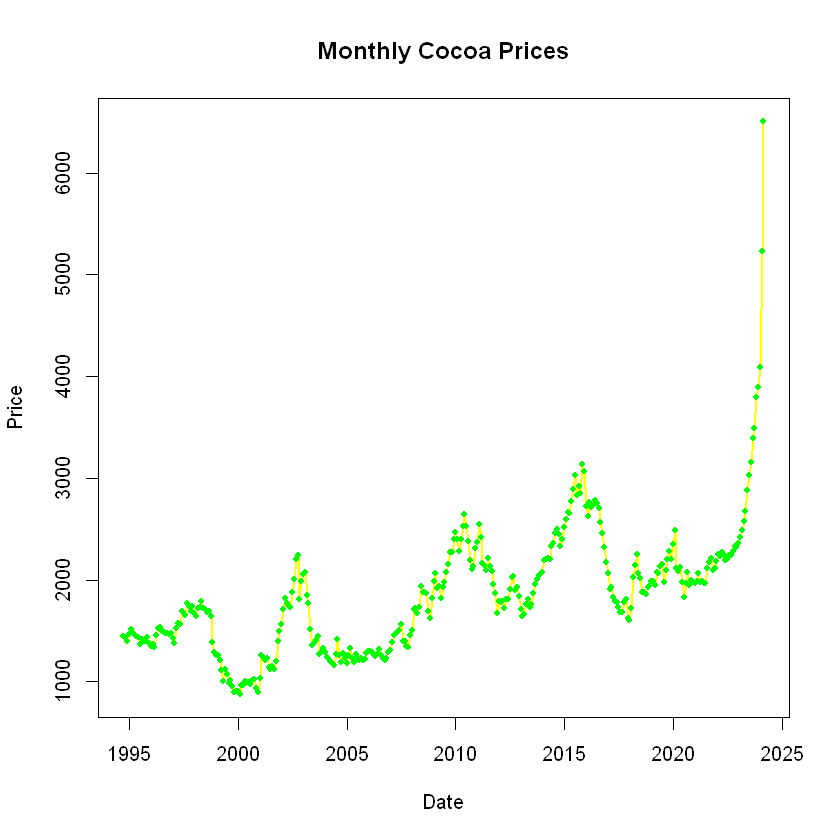

In [159]:
plot(cocoa_data$Date, cocoa_data$Price, type = "l", col = "yellow", main = "Monthly Cocoa Prices",
     xlab = "Date", ylab = "Price", lwd = 2)
points(cocoa_data$Date, cocoa_data$Price, col = "green", pch = 20) 

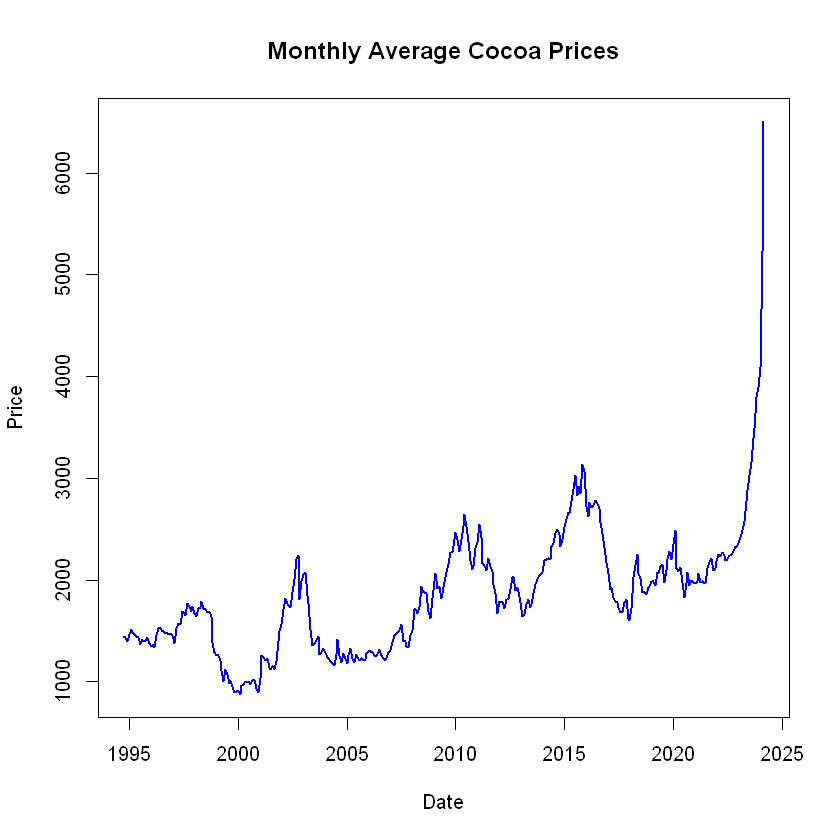

In [160]:
# Convert Date column to Date type
cocoa_data$Date <- as.Date(cocoa_data$Date)

# Plot the raw time series
plot(cocoa_data$Date, cocoa_data$Price, type='l', 
     main='Monthly Average Cocoa Prices',
     xlab='Date', ylab='Price',
     col='blue', lwd=2)


### Additive Decomposition 

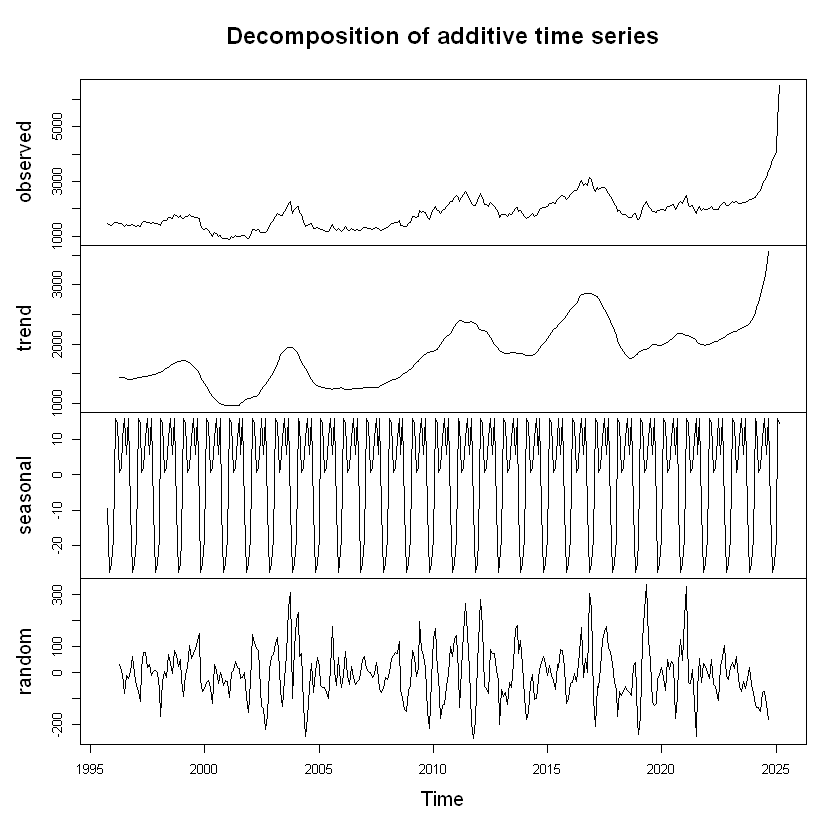

In [161]:
cocoa_ts <- ts(cocoa_data$Price, start = c(1995, 10), frequency = 12)

fit.add <- decompose(cocoa_ts, type='additive')
plot(fit.add)

### multiplicative decomposition

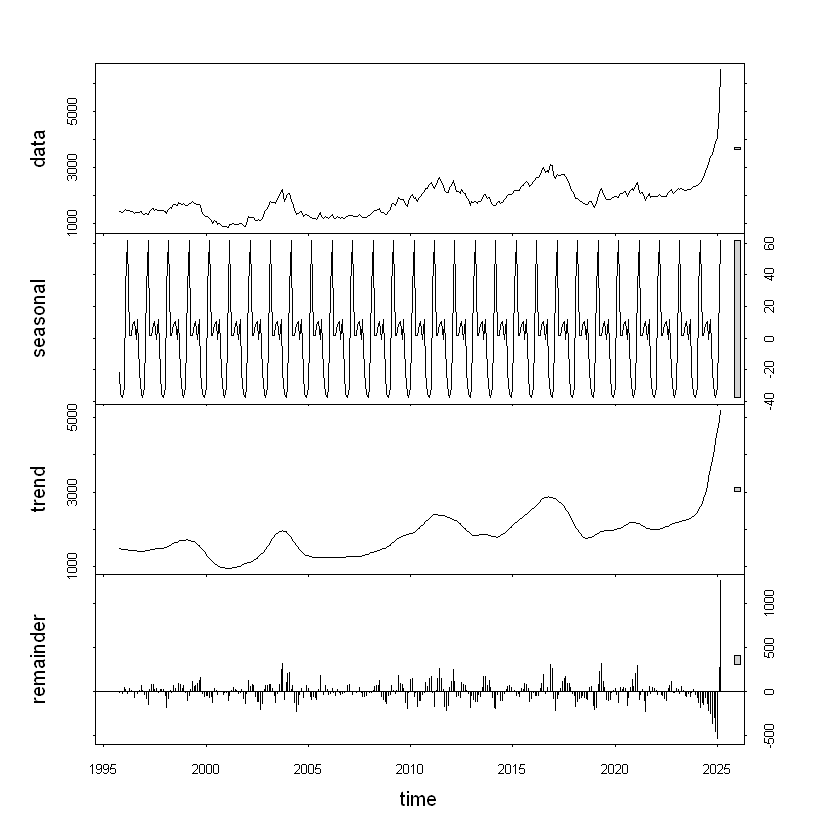

In [162]:
#multipicative decomposition
fit.lstl <- stl(cocoa_ts, s.window="period")
plot(fit.lstl)

### Box plot

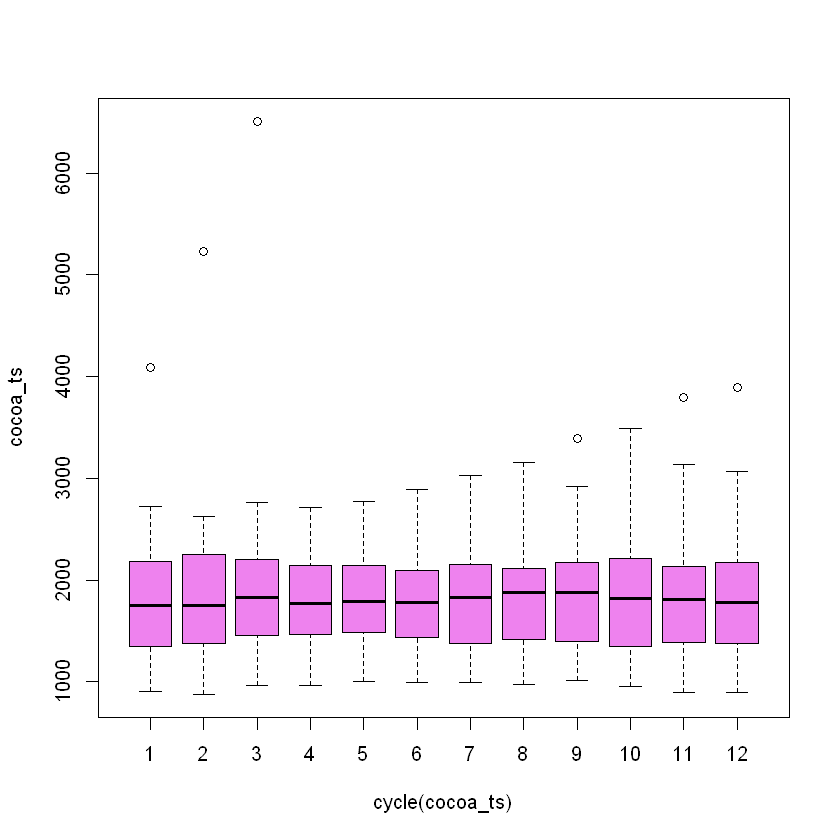

In [163]:
#cycle(cocoa_ts)
boxplot(cocoa_ts~cycle(cocoa_ts), col='violet')

### Regression Models

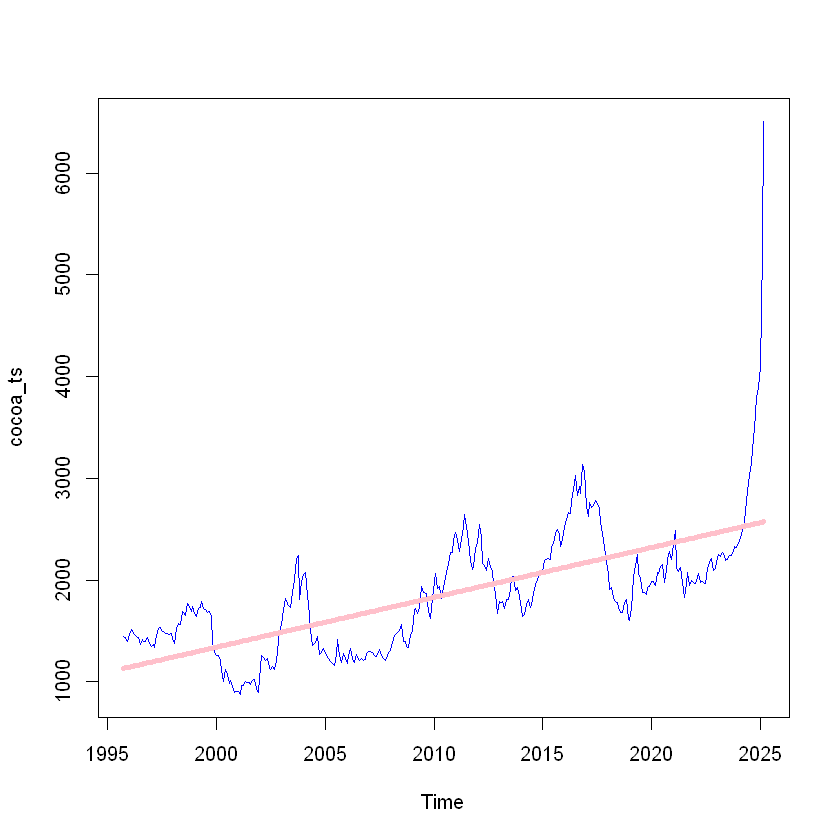

In [164]:
#Regression Models
#4.1 Linear Model
cocoaMod <- lm(cocoa_ts~time(cocoa_ts))
plot(cocoa_ts, col='blue')
x <- as.vector(time(cocoa_ts))
y <- predict.lm(cocoaMod)
lines(x, y, col='pink', lw=4)

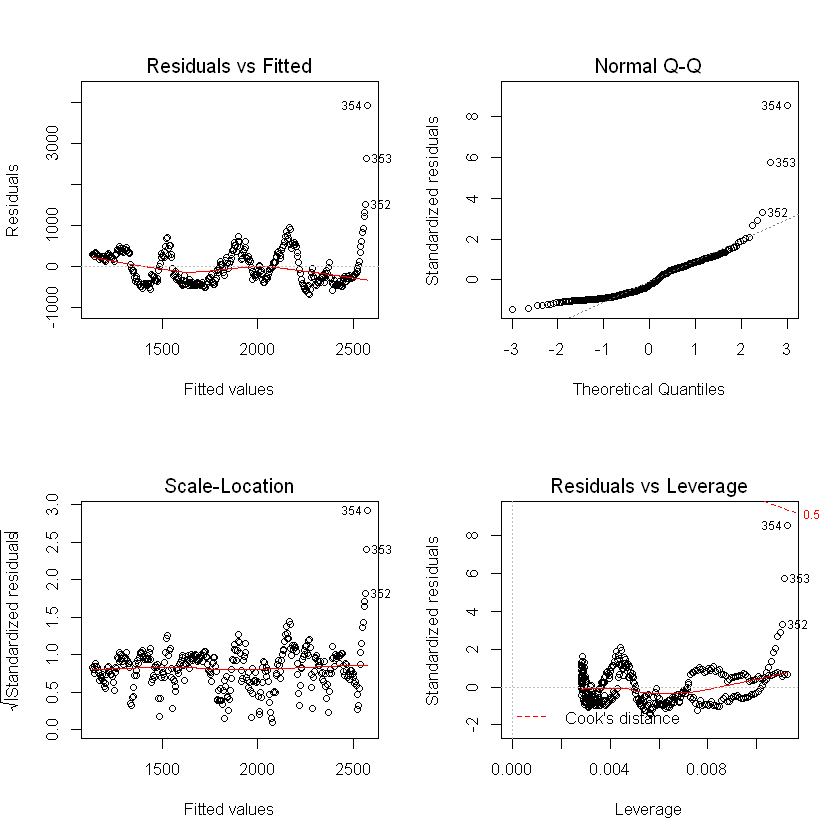

In [165]:
par(mfrow=c(2,2))
plot(cocoaMod)

In [166]:
summary(cocoaMod)


Call:
lm(formula = cocoa_ts ~ time(cocoa_ts))

Residuals:
   Min     1Q Median     3Q    Max 
-671.5 -353.1 -110.4  282.1 3936.9 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -96601.007   5813.128  -16.62   <2e-16 ***
time(cocoa_ts)     48.971      2.891   16.94   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 463.3 on 352 degrees of freedom
Multiple R-squared:  0.449,	Adjusted R-squared:  0.4474 
F-statistic: 286.8 on 1 and 352 DF,  p-value: < 2.2e-16


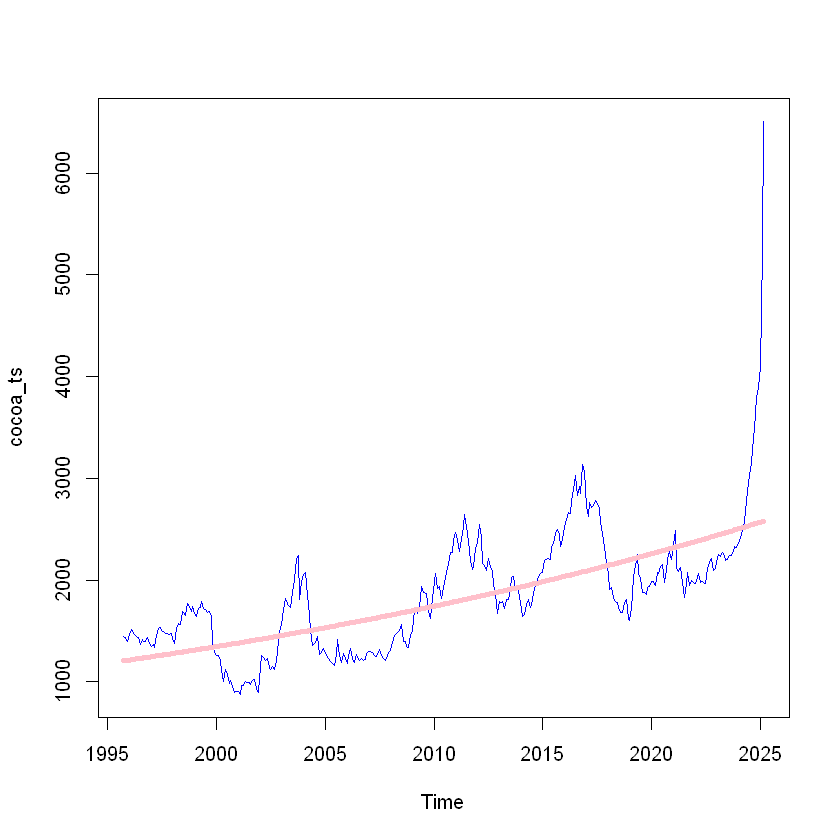

In [167]:
#Logarithmic Model
cocoaMod <- lm(log(cocoa_ts)~time(cocoa_ts))
plot(cocoa_ts, col='blue')
x <- as.vector(time(cocoa_ts))
y <- exp(predict.lm(cocoaMod))
lines(x, y, col='pink', lw=4)

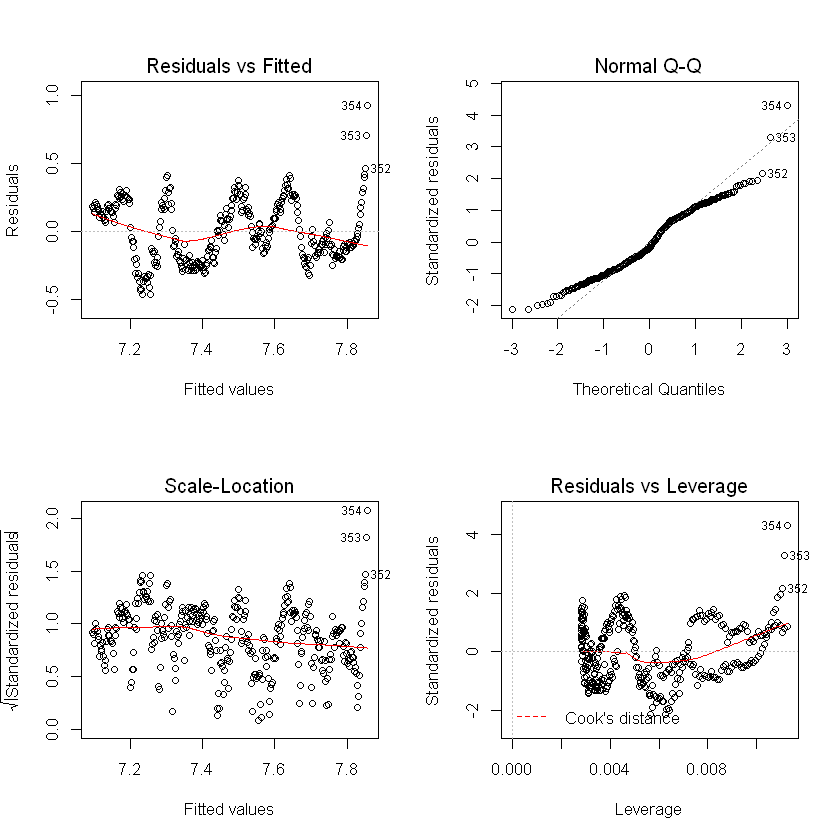

In [168]:
par(mfrow=c(2,2))
plot(cocoaMod)


In [169]:
summary(cocoaMod)


Call:
lm(formula = log(cocoa_ts) ~ time(cocoa_ts))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46020 -0.17464 -0.03651  0.17473  0.92533 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -44.477732   2.717018  -16.37   <2e-16 ***
time(cocoa_ts)   0.025842   0.001351   19.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2165 on 352 degrees of freedom
Multiple R-squared:  0.5095,	Adjusted R-squared:  0.5081 
F-statistic: 365.6 on 1 and 352 DF,  p-value: < 2.2e-16


### Simple Exponential Smoothing

In [170]:
#train and test the data
train <- window(cocoa_ts, end=c(2023, 9))#taking from 1994 to 2023 sep as train data
test <- window(cocoa_ts, start=c(2023, 10), end=c(2024, 3))#taking from 2023 oct to 2024 mar as test data

In [171]:
## Simple Exponential Smoothing
nhfit <- ses(train, h=length(test))

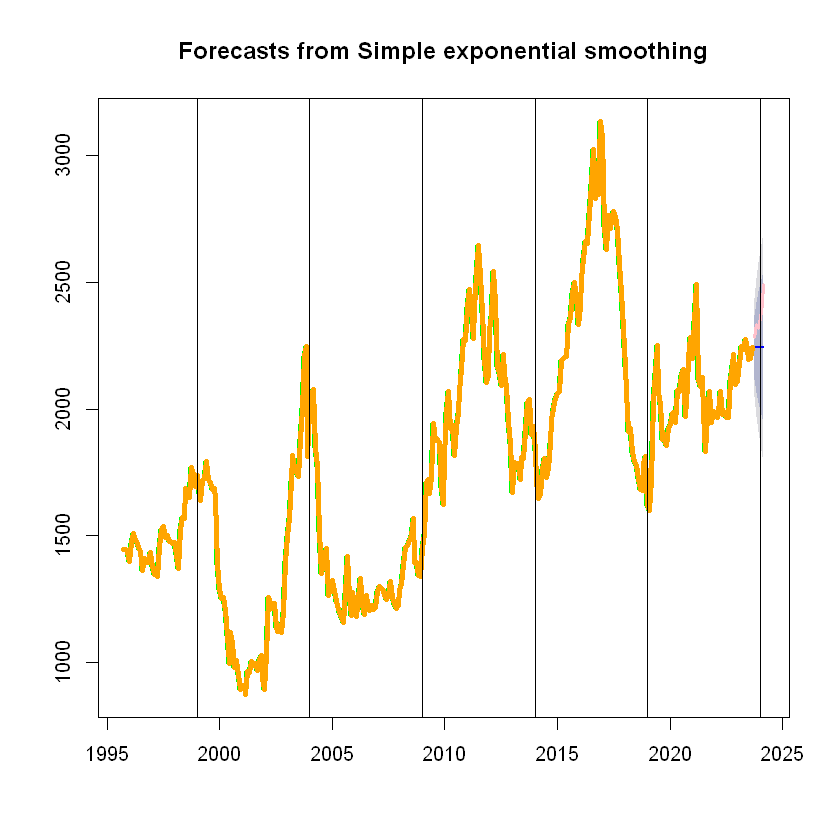

In [172]:
plot(nhfit, lw=2, col='green')

x <- as.vector(time(train))
y <- nhfit$fitted
lines(x, y, col='orange', lw=4)

x <- as.vector(time(test))
y <- test
lines(x, y, col='pink', lwd=3)

abline(v=seq(1994, 2024, length.out=7), lwd=0.5)
abline(h=48:55, lwd=0.5)

In [174]:
 #holds the result of a model fitting process
nhfit

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023        2243.96 2118.067 2369.852 2051.424 2436.496
Nov 2023        2243.96 2065.930 2421.990 1971.686 2516.233
Dec 2023        2243.96 2025.922 2461.998 1910.500 2577.420
Jan 2024        2243.96 1992.194 2495.726 1858.917 2629.003
Feb 2024        2243.96 1962.478 2525.442 1813.470 2674.449
Mar 2024        2243.96 1935.613 2552.307 1772.384 2715.536

In [179]:
 #the accessing the model component of a fitted model object stored in nhfit
nhfit$model

Simple exponential smoothing 

Call:
 ses(y = train, h = length(test)) 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 1448.1349 

  sigma:  98.2345

     AIC     AICc      BIC 
5041.248 5041.320 5052.699 

In [180]:
nhfit_0.05 <- ses(train, h=length(test), alpha=0.05)

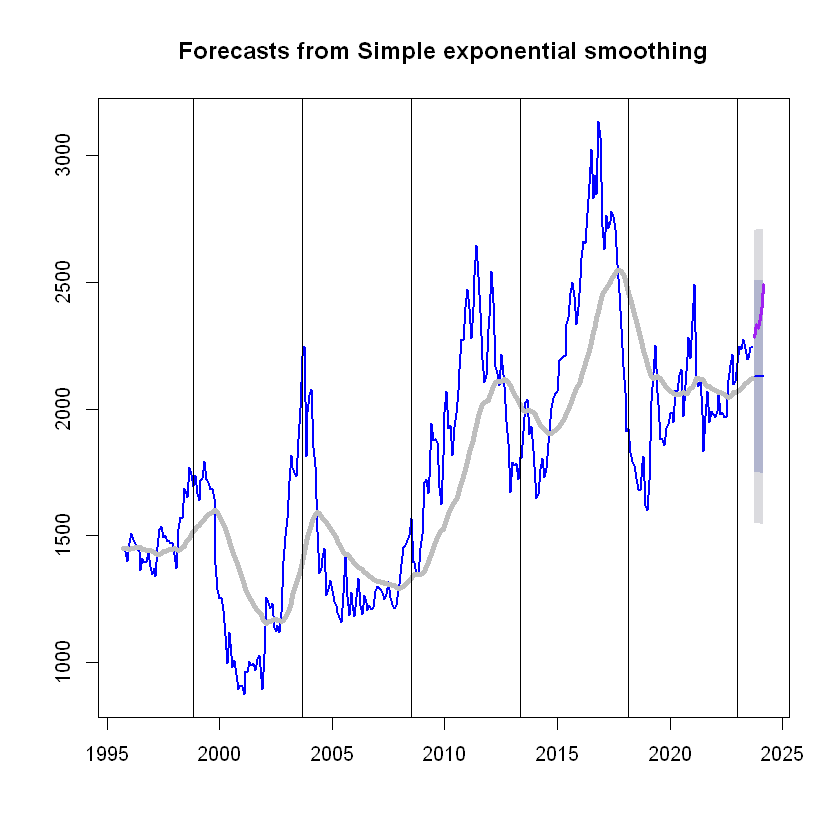

In [181]:
plot(nhfit_0.05, lw=2, col='blue')

x <- as.vector(time(train))
y <- nhfit_0.05$fitted
lines(x, y, col='grey', lw=4)

x <- as.vector(time(test))
y <- test
lines(x, y, col='purple', lwd=3)

abline(v=seq(1994, 2023, length.out=7), lwd=0.5)
abline(h=48:55, lwd=0.5)

In [182]:
nhfit_0.05

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       2127.836 1749.937 2505.734 1549.890 2705.782
Nov 2023       2127.836 1749.465 2506.207 1549.168 2706.504
Dec 2023       2127.836 1748.994 2506.678 1548.447 2707.225
Jan 2024       2127.836 1748.523 2507.149 1547.727 2707.945
Feb 2024       2127.836 1748.053 2507.619 1547.007 2708.664
Mar 2024       2127.836 1747.583 2508.089 1546.289 2709.383

In [183]:
round(accuracy(nhfit_0.05, test),3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,40.289,293.997,228.553,-0.476,13.206,0.785,0.942,NA
Test set,239.067,248.954,239.067,10.024,10.024,0.821,0.372,5.078


In [184]:
nhfit_0.4 <- ses(train, h=length(test), alpha=0.4)

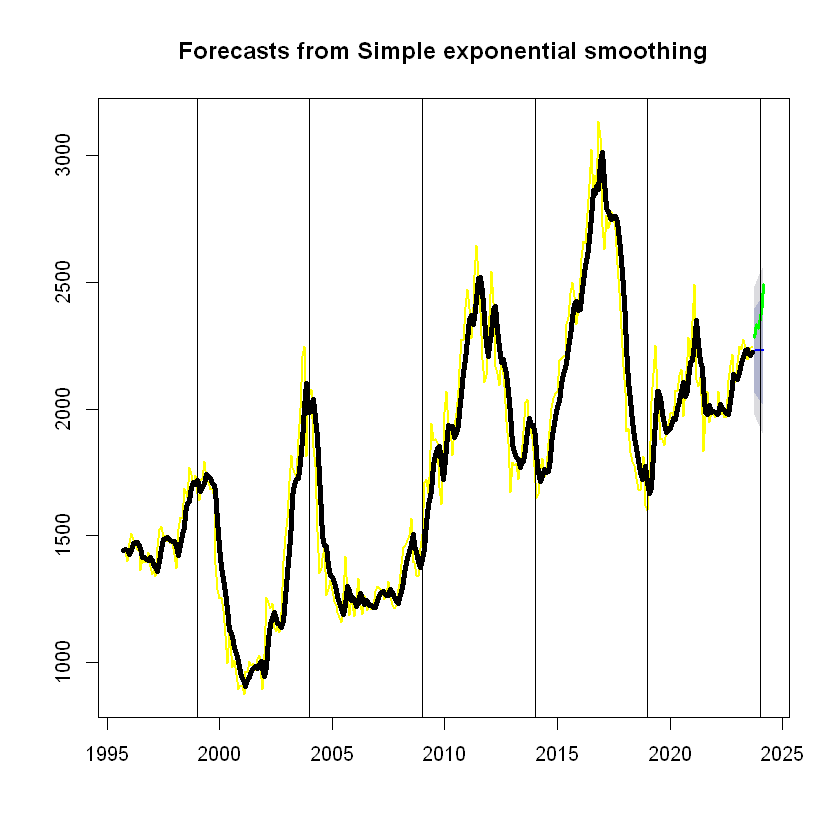

In [185]:
plot(nhfit_0.4, lw=2, col='yellow')

x <- as.vector(time(train))
y <- nhfit_0.4$fitted
lines(x, y, col='black', lw=4)

x <- as.vector(time(test))
y <- test
lines(x, y, col='green', lwd=3)

abline(v=seq(1994, 2024, length.out=7), lwd=0.5)
abline(h=48:55, lwd=0.5)

In [186]:
nhfit_0.4

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       2231.988 2067.102 2396.874 1979.817 2484.159
Nov 2023       2231.988 2054.401 2409.575 1960.392 2503.584
Dec 2023       2231.988 2042.549 2421.427 1942.266 2521.710
Jan 2024       2231.988 2031.396 2432.580 1925.209 2538.767
Feb 2024       2231.988 2020.831 2443.145 1909.052 2554.924
Mar 2024       2231.988 2010.771 2453.205 1893.665 2570.311

In [187]:
round(accuracy(nhfit_0.4, test),3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,5.862,128.277,97.915,-0.093,5.578,0.336,0.647,NA
Test set,134.915,151.746,134.915,5.620,5.620,0.464,0.372,3.152


In [188]:
nhfit_0.7 <- ses(train, h=length(test), alpha=0.7)

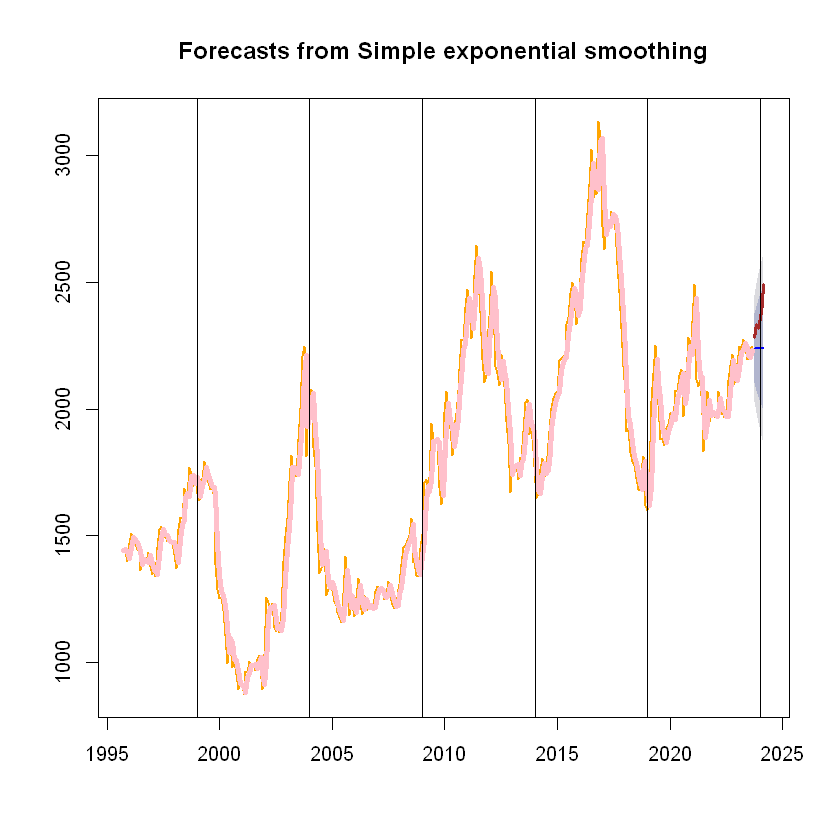

In [189]:
plot(nhfit_0.7, lw=2, col='orange')

x <- as.vector(time(train))
y <- nhfit_0.7$fitted
lines(x, y, col='pink', lw=4)

x <- as.vector(time(test))
y <- test
lines(x, y, col='Brown', lwd=3)

abline(v=seq(1994, 2024, length.out=7), lwd=0.5)
abline(h=48:55, lwd=0.5)

In [190]:
nhfit_0.7

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Oct 2023       2239.963 2103.714 2376.212 2031.588 2448.337
Nov 2023       2239.963 2073.650 2406.276 1985.609 2494.316
Dec 2023       2239.963 2048.243 2431.682 1946.753 2533.172
Jan 2024       2239.963 2025.831 2454.095 1912.476 2567.449
Feb 2024       2239.963 2005.551 2474.374 1881.461 2598.464
Mar 2024       2239.963 1986.891 2493.034 1852.924 2627.002

In [191]:
round(accuracy(nhfit_0.7, test),3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,3.387,105.999,80.339,-0.042,4.550,0.276,0.393,NA
Test set,126.941,144.702,126.941,5.283,5.283,0.436,0.372,3.01


## Naive or Random Walk Forecast

In [192]:
cocoa_ts.rw <- rwf(train, h=length(test))

In [193]:
xlim=c(time(train)[1], time(test)[length(test)])
ylim=c(1000, 6500)

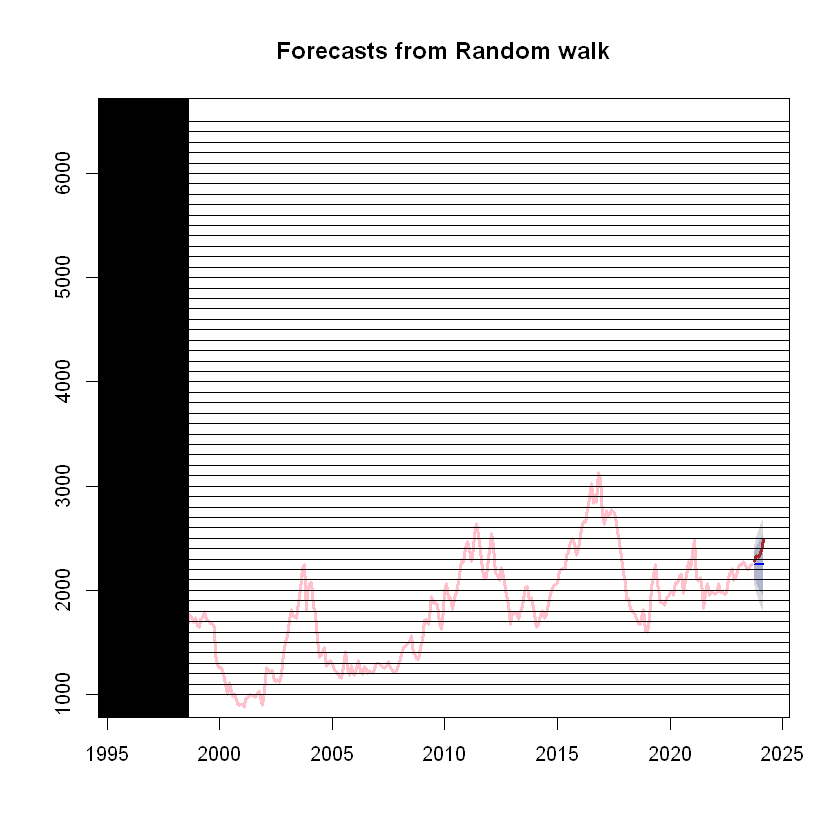

In [194]:
plot(cocoa_ts.rw, col='pink', lwd=3, xlim=xlim, ylim=ylim)

x <- as.vector(time(test))
y <- test
lines(x, y, col='brown', lwd=3)

abline(h=seq(1000,6500,100), lw=0.3)
abline(v=seq(1994+100/260, 1998+165/260, 5/260), lw=0.3)

In [195]:
round(accuracy(cocoa_ts.rw, test),3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.376,98.086,73.018,-0.020,4.145,0.251,0.141,NA
Test set,122.943,141.208,122.943,5.114,5.114,0.422,0.372,2.939


### ETS ANN model

In [196]:
#Additive error, No trend, No seasonality
nhfit2 <- ets(train, model='ANN')

In [197]:
fc2 <- forecast(nhfit2, h=length(test))

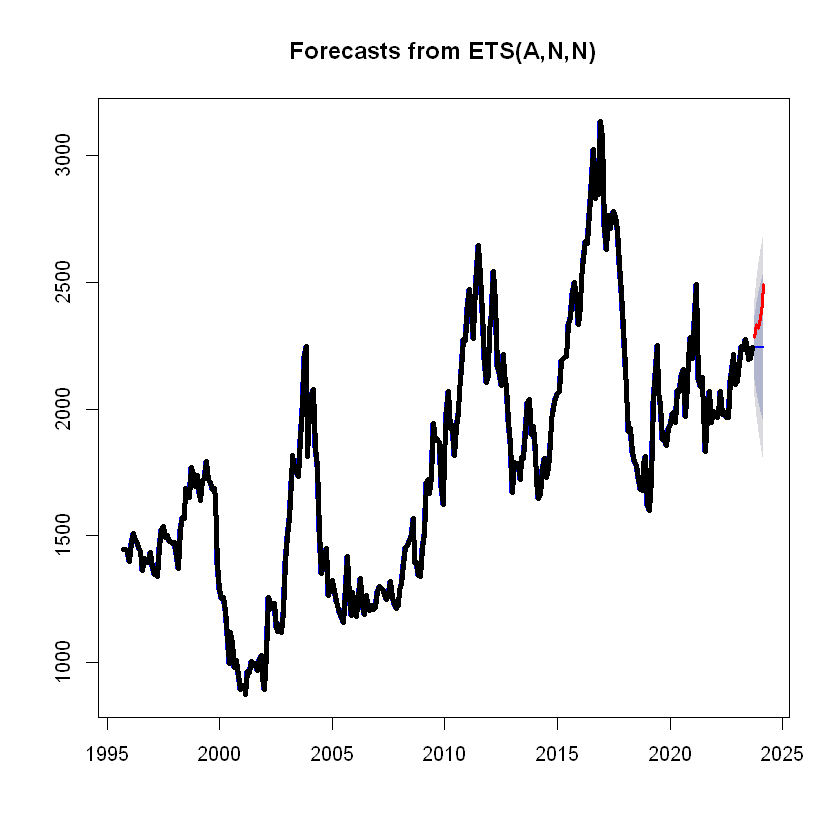

In [198]:
plot(fc2, lw=2, col='blue')

x <- as.vector(time(train))
y <- nhfit2$fitted
lines(x, y, col='black', lw=4)

x <- as.vector(time(test))
y <- test
lines(x, y, col='red', lwd=3)

abline(v=seq(1910, 1970, length.out=7), lwd=0.5)
abline(h=48:55, lwd=0.5)

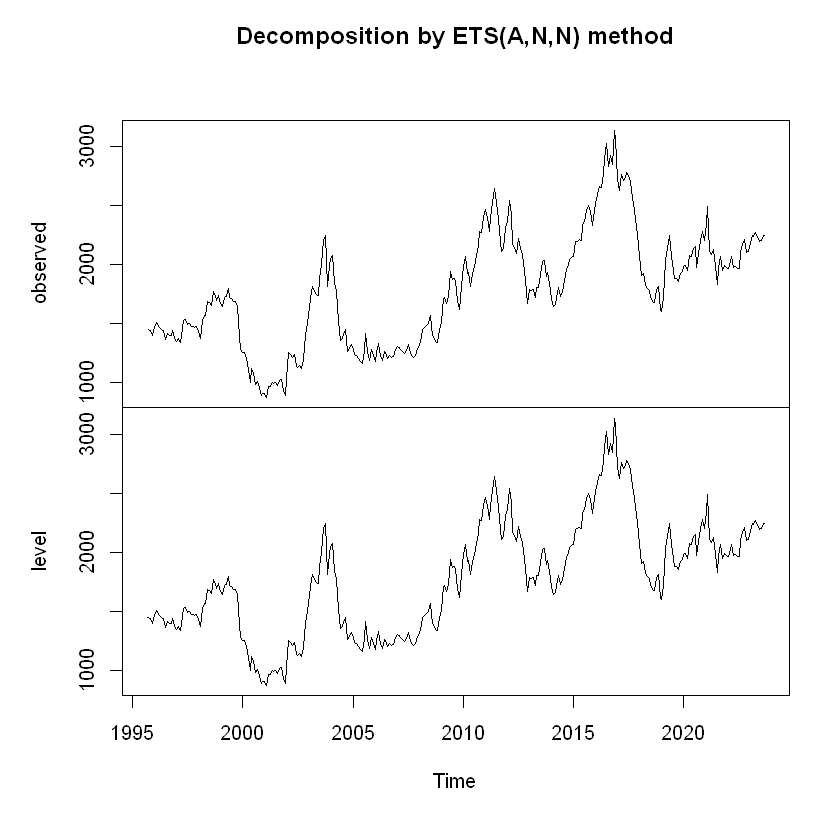

In [199]:
plot(nhfit2)

In [200]:
round(accuracy(fc2, test),3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.368,97.942,72.803,-0.020,4.133,0.250,0.141,NA
Test set,122.944,141.208,122.944,5.114,5.114,0.422,0.372,2.939


### ARIMA model

In [201]:
train_data <- window(cocoa_ts, end = c(2023, 9))
test_data <- window(cocoa_ts, start = c(2023, 10), end = c(2024, 3))

In [202]:
# Fit ARIMA model on training data
fitted_model <- auto.arima(train_data)

# Display the fitted model summary
summary(fitted_model)

Series: train_data 
ARIMA(0,1,1) 

Coefficients:
         ma1
      0.1682
s.e.  0.0566

sigma^2 estimated as 9416:  log likelihood=-2007.52
AIC=4019.03   AICc=4019.07   BIC=4026.66

Training set error measures:
                   ME     RMSE      MAE          MPE     MAPE      MASE
Training set 2.030469 96.74819 71.38616 -0.009755636 4.058061 0.2452746
                    ACF1
Training set -0.01088461


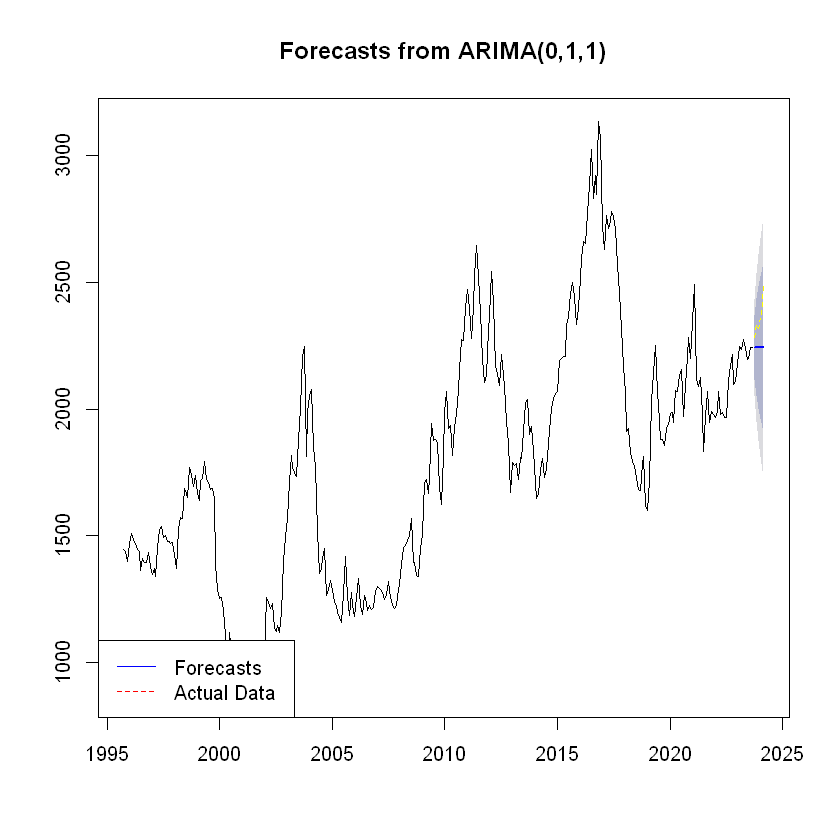

In [203]:
forecasts <- forecast(fitted_model, h=6)

# Plot the forecasts
plot(forecasts)
lines(test_data, col = "yellow", lty = 2)  # Add actual data to the plot for comparison
legend("bottomleft", legend = c("Forecasts", "Actual Data"), col = c("blue", "red"), lty = 1:2)

In [204]:
accuracy_measures <- accuracy(forecasts, test_data)
print(accuracy_measures)

                     ME      RMSE       MAE          MPE     MAPE      MASE
Training set   2.030469  96.74819  71.38616 -0.009755636 4.058061 0.2452746
Test set     123.762137 141.92179 123.76214  5.148626269 5.148626 0.4252324
                    ACF1 Theil's U
Training set -0.01088461        NA
Test set      0.37200592  2.953471


### SARIMA MODEL

In [205]:
fitted_model <- auto.arima(train_data, seasonal = TRUE, stepwise = TRUE, approximation = FALSE, trace = TRUE)

# Display the fitted model summary
summary(fitted_model)


 ARIMA(2,1,2)(1,0,1)[12] with drift         : 4027.873
 ARIMA(0,1,0)            with drift         : 4027.047
 ARIMA(1,1,0)(1,0,0)[12] with drift         : 4024.466
 ARIMA(0,1,1)(0,0,1)[12] with drift         : 4023.004
 ARIMA(0,1,0)                               : 4025.219
 ARIMA(0,1,1)            with drift         : 4020.956
 ARIMA(0,1,1)(1,0,0)[12] with drift         : 4023.004
 ARIMA(0,1,1)(1,0,1)[12] with drift         : 4025.061
 ARIMA(1,1,1)            with drift         : 4022.38
 ARIMA(0,1,2)            with drift         : 4021.664
 ARIMA(1,1,0)            with drift         : 4022.417
 ARIMA(1,1,2)            with drift         : 4022.934
 ARIMA(0,1,1)                               : 4019.067
 ARIMA(0,1,1)(1,0,0)[12]                    : 4021.103
 ARIMA(0,1,1)(0,0,1)[12]                    : 4021.103
 ARIMA(0,1,1)(1,0,1)[12]                    : 4023.148
 ARIMA(1,1,1)                               : 4020.484
 ARIMA(0,1,2)                               : 4019.787
 ARIMA(1,1

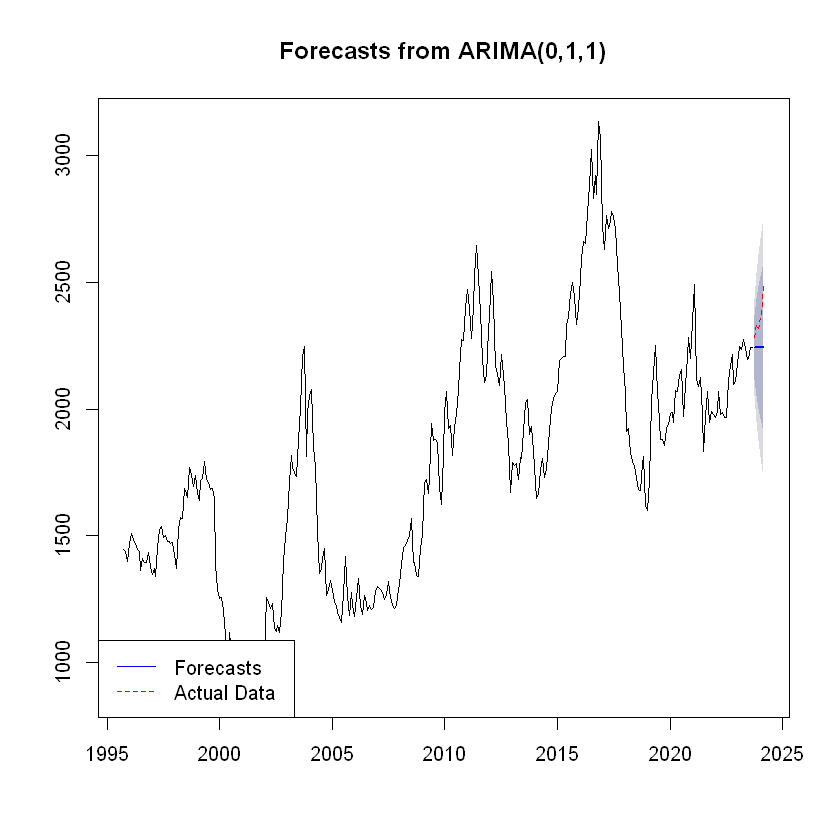

In [206]:
# Forecast the next 6 months
forecasts <- forecast(fitted_model, h=6)

# Plot the forecasts along with the actual data
plot(forecasts)
lines(test_data, col = "red", lty = 2)  # Add actual data to the plot for comparison
legend("bottomleft", legend = c("Forecasts", "Actual Data"), col = c("blue", "red"), lty = 1:2)


In [207]:
accuracy_measures <- accuracy(forecasts, test_data)
print(accuracy_measures)

                     ME      RMSE       MAE          MPE     MAPE      MASE
Training set   2.030469  96.74819  71.38616 -0.009755636 4.058061 0.2452746
Test set     123.762137 141.92179 123.76214  5.148626269 5.148626 0.4252324
                    ACF1 Theil's U
Training set -0.01088461        NA
Test set      0.37200592  2.953471


Series: train_data 
ARIMA(1,1,1)(1,1,1)[12] 

Coefficients:
          ar1     ma1    sar1     sma1
      -0.1573  0.3173  0.0064  -1.0000
s.e.   0.2050  0.1922  0.0564   0.0469

sigma^2 estimated as 9553:  log likelihood=-1956.3
AIC=3922.61   AICc=3922.8   BIC=3941.5

Training set error measures:
                    ME    RMSE      MAE         MPE     MAPE      MASE
Training set 0.9730342 95.2359 69.45453 -0.02085397 3.940571 0.2386377
                    ACF1
Training set -0.00516754


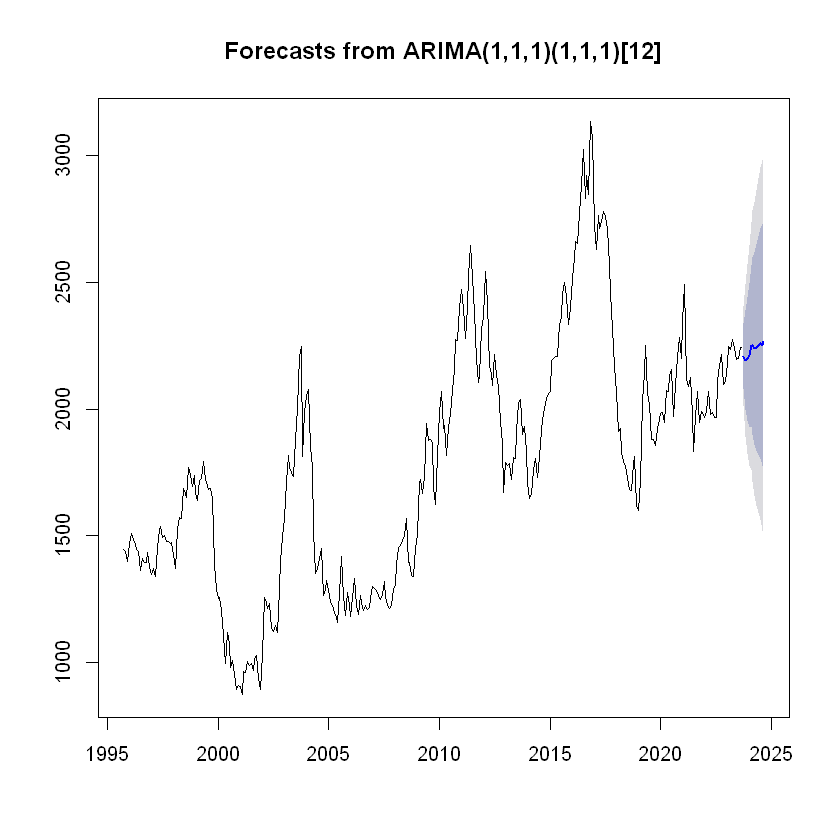

In [208]:
sarima_model <- Arima(train_data, order = c(1, 1, 1), seasonal = list(order = c(1, 1, 1), period = 12))

# Summary of the model
summary(sarima_model)

# Forecasting the next 12 periods
forecasts <- forecast(sarima_model, h=12)

# Plotting the forecast
plot(forecasts)

         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
Oct 2023       2243.141 2118.783 2367.500 2052.9513 2433.331
Nov 2023       2243.141 2051.904 2434.378 1950.6695 2535.613
Dec 2023       2243.141 2002.979 2483.304 1875.8441 2610.438
Jan 2024       2243.141 1962.455 2523.827 1813.8690 2672.413
Feb 2024       2243.141 1927.086 2559.197 1759.7758 2726.507
Mar 2024       2243.141 1895.294 2590.988 1711.1547 2775.128
Apr 2024       2243.141 1866.174 2620.108 1666.6196 2819.663
May 2024       2243.141 1839.148 2647.135 1625.2864 2860.996
Jun 2024       2243.141 1813.819 2672.463 1586.5499 2899.732
Jul 2024       2243.141 1789.904 2696.378 1549.9749 2936.308
Aug 2024       2243.141 1767.189 2719.093 1515.2353 2971.047
Sep 2024       2243.141 1745.510 2740.773 1482.0797 3004.203
Oct 2024       2243.141 1724.736 2761.546 1450.3096 3035.973
Nov 2024       2243.141 1704.764 2781.518 1419.7643 3066.518
Dec 2024       2243.141 1685.506 2800.776 1390.3124 3095.970
Jan 2025       2243.141 

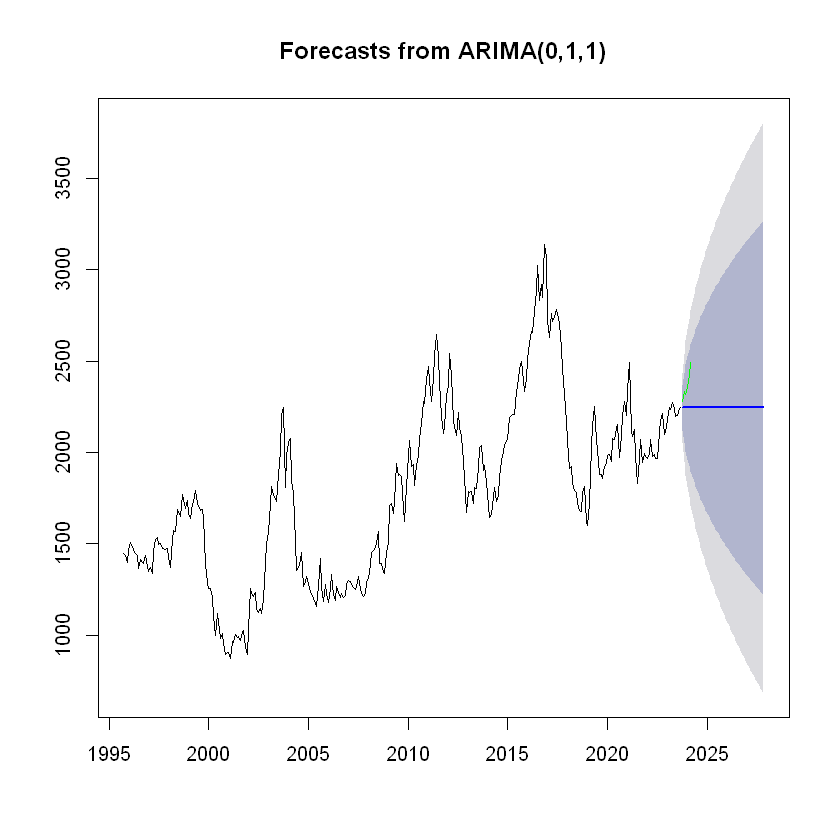

In [209]:
arima_model <- auto.arima(train_data)

# Forecast using the fitted model
arima_forecast <- forecast(arima_model, h = 50)  # Change 'h' for your desired forecast length

# Print the forecast
print(arima_forecast)

# Plot the forecast
plot(arima_forecast)
lines(test_data, col = 'green')

In [210]:
accuracy(arima_forecast, test_data)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.030469,96.74819,71.38616,-0.009755636,4.058061,0.2452746,-0.01088461,NA
Test set,123.762137,141.92179,123.76214,5.148626269,5.148626,0.4252324,0.37200592,2.953471


In [211]:
summary(arima_forecast)


Forecast method: ARIMA(0,1,1)

Model Information:
Series: train_data 
ARIMA(0,1,1) 

Coefficients:
         ma1
      0.1682
s.e.  0.0566

sigma^2 estimated as 9416:  log likelihood=-2007.52
AIC=4019.03   AICc=4019.07   BIC=4026.66

Error measures:
                   ME     RMSE      MAE          MPE     MAPE      MASE
Training set 2.030469 96.74819 71.38616 -0.009755636 4.058061 0.2452746
                    ACF1
Training set -0.01088461

Forecasts:
         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
Oct 2023       2243.141 2118.783 2367.500 2052.9513 2433.331
Nov 2023       2243.141 2051.904 2434.378 1950.6695 2535.613
Dec 2023       2243.141 2002.979 2483.304 1875.8441 2610.438
Jan 2024       2243.141 1962.455 2523.827 1813.8690 2672.413
Feb 2024       2243.141 1927.086 2559.197 1759.7758 2726.507
Mar 2024       2243.141 1895.294 2590.988 1711.1547 2775.128
Apr 2024       2243.141 1866.174 2620.108 1666.6196 2819.663
May 2024       2243.141 1839.148 2647.135 1625.2864 2860